In [3]:
import pandas as pd 
from pandas.plotting import scatter_matrix
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set(font_scale= 1.5)

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [4]:
train_data = pd.read_csv('Titanic.csv', index_col= 0)
train_data.shape

(418, 11)

In [5]:
train_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
train_data.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [7]:
train_data.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [8]:
train_data.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [9]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [11]:
train_data.shape

(418, 11)

In [44]:
train_data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [45]:
train_data = pd.read_csv('Titanic.csv', index_col= 0)
train_data = train_data.drop(['Name','Ticket','Cabin'],axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,0,3,male,34.5,0,0,7.8292,Q
893,1,3,female,47.0,1,0,7.0000,S
894,0,2,male,62.0,0,0,9.6875,Q
895,0,3,male,27.0,0,0,8.6625,S
896,1,3,female,22.0,1,1,12.2875,S


In [51]:
# fuction of assigning age missing value 
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
                
           

In [53]:
train_data.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.467290,40.918367,0.476636,0.383178,94.280297
2,0.322581,28.777500,0.376344,0.344086,22.202104
3,0.330275,24.027945,0.463303,0.417431,12.459678


In [56]:
train_data['Age'] = train_data[['Age','Pclass']].apply(age_approx,axis=1)

In [58]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [61]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [70]:
train_data_dummied = pd.get_dummies(train_data,columns=['Sex'])

In [71]:
train_data_dummied = pd.get_dummies(train_data,columns=['Embarked'])

In [73]:
train_data_dummied.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,0,3,male,34.5,0,0,7.8292,0,1,0
893,1,3,female,47.0,1,0,7.0000,0,0,1
894,0,2,male,62.0,0,0,9.6875,0,1,0
895,0,3,male,27.0,0,0,8.6625,0,0,1
896,1,3,female,22.0,1,1,12.2875,0,0,1


<AxesSubplot:>

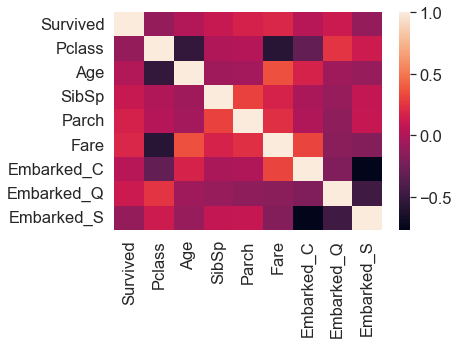

In [76]:
plt.figure(figsize=(6,4))
sns.heatmap(train_data_dummied.corr())

In [120]:
used_features = ["Pclass","SibSp","Parch","Embarked_C","Embarked_Q","Embarked_S"]
X = train_data_dummied[used_features].values
y = train_data_dummied['Survived']

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [122]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(291, 6)
(126, 6)
(291,)
(126,)


In [123]:
LogReg = LogisticRegression()

In [124]:
LogReg.fit(X_train,y_train)

LogisticRegression()

In [126]:
y_pred= LogReg.predict(X_test)

In [127]:
metrics.confusion_matrix(y_test,y_pred)

array([[66, 14],
       [35, 11]], dtype=int64)

In [128]:
metrics.accuracy_score(y_test,y_pred)

0.6111111111111112

In [129]:
len(X_test)

126

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.82      0.73        80
           1       0.44      0.24      0.31        46

    accuracy                           0.61       126
   macro avg       0.55      0.53      0.52       126
weighted avg       0.58      0.61      0.58       126



In [106]:
LogReg.coef_

array([[-0.40325904,  0.1092412 ,  0.3509303 , -0.3112879 ,  0.82301223,
        -0.51179763]])

In [108]:
LogReg.intercept_

array([0.4477345])

In [110]:
train_data_dummied[used_features].columns

Index(['Pclass', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype='object')

In [133]:
LogReg.predict_proba(X_test)

array([[0.78139943, 0.21860057],
       [0.78139943, 0.21860057],
       [0.70486662, 0.29513338],
       [0.69289074, 0.30710926],
       [0.35662282, 0.64337718],
       [0.5663102 , 0.4336898 ],
       [0.69289074, 0.30710926],
       [0.48476232, 0.51523768],
       [0.6816446 , 0.3183554 ],
       [0.54208038, 0.45791962],
       [0.45181029, 0.54818971],
       [0.48476232, 0.51523768],
       [0.70486662, 0.29513338],
       [0.70158316, 0.29841684],
       [0.78139943, 0.21860057],
       [0.78139943, 0.21860057],
       [0.74522977, 0.25477023],
       [0.78139943, 0.21860057],
       [0.38598315, 0.61401685],
       [0.6816446 , 0.3183554 ],
       [0.59181412, 0.40818588],
       [0.70486662, 0.29513338],
       [0.72393981, 0.27606019],
       [0.48476232, 0.51523768],
       [0.62706614, 0.37293386],
       [0.48476232, 0.51523768],
       [0.53931151, 0.46068849],
       [0.74180243, 0.25819757],
       [0.42508088, 0.57491912],
       [0.48476232, 0.51523768],
       [0.